In [11]:
# Logistic regression (you do not have to do anything in this cell)

# import the libraries that we will need
from sklearn import datasets
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Now we load the breast cancer dataset
X, y = datasets.load_breast_cancer(return_X_y=True)

# we will only use the first feature (you should try with others after 
# completing the notebook)
X = X[:, 0]

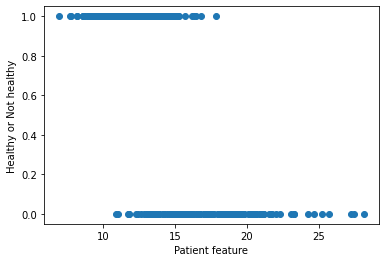

In [12]:
# now we split the data (you do not have to do anything in this cell)

# because we want to use cross validation, 
# we randomly select 10% as test, 10% as validation, and 80% as training
Ntotal = X.shape[0]
Ntest_val = int(Ntotal/5)
Nval = Ntest_val/2
Ntrain = Ntotal - Ntest_val

# now let's generate the indices for the test and val
test_val_idx = np.random.choice(range(Ntotal),Ntest_val,replace=False)
test_idx = test_val_idx[:int(Ntest_val/2)]
val_idx = test_val_idx[int(Ntest_val/2):]

X_ts = X[test_idx]
y_ts = y[test_idx]
X_vl = X[val_idx]
y_vl = y[val_idx]
X_tr = np.delete(X, test_val_idx)
y_tr = np.delete(y, test_val_idx)

# we forget about the testing data for now

# here 1 means that the patient is healthy
# and 0 means that the patient has cancer
plt.scatter(X_tr,y_tr)
plt.xlabel('Patient feature')
plt.ylabel('Healthy or Not healthy')
plt.show()

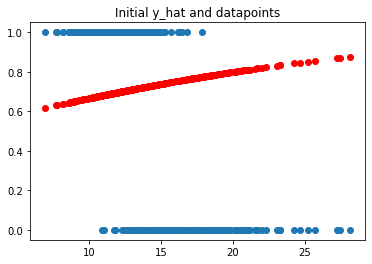

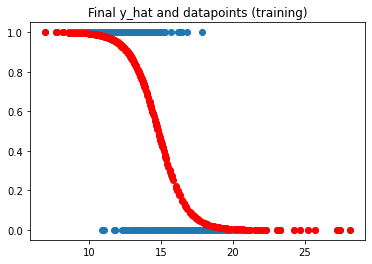

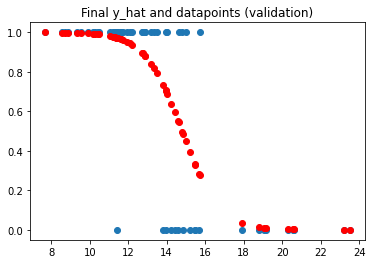

In [13]:
# we want to find the best values for bias and slope
# since we do not know them, let's initialize them to be
# random numbers from a normal distribution with zero mean
# and a small variance (much smaller than 1)

bias = 0
slope = np.random.randn(1)

# now we can get y_hat for the training data
# challenge: can you do this with linear algebra multiplying a vector 
# (containing the bias and slope) by a matrix containing the datapoints?
score = bias + slope*X_tr
y_hat = 1/(1 + np.exp(-score))

# let's visualize y_hat and the datapoints
plt.scatter(X_tr,y_tr)
plt.scatter(X_tr, y_hat, c='r')
plt.title('Initial y_hat and datapoints')
plt.show()

# define the learning rate
learning_rate = 0.01

# now we put everything in a for loop, so that we can repeat the process
Niters = 40000

for iter in range(Niters):
  # calculate the y_hat with the slope and bias values
  # for the training set
  score = bias + slope * X_tr
  y_hat = 1 / (1 + math.exp(1) ** (-1 * score))
  J = (-1 / Ntrain) * sum((y_tr) * np.log(y_hat) + (1 - y_tr) * np.log(y_hat))
  
  # now do the same for the validation set
  score = bias + slope * X_vl
  y_hat_vl = 1 / (1 + math.exp(1) ** (-1 * score))
  J_vl = (-1 / Nval) * sum((y_vl) * np.log(y_hat_vl) + (1 - y_vl) * np.log(y_hat_vl))

  # update the bias and slope terms
  dJdbias = (1/Ntrain) * sum(y_hat - y_tr)
  dJdslope = (1/Ntrain) * sum((y_hat - y_tr) * X_tr)
  bias = bias - learning_rate * dJdbias
  slope = slope - learning_rate * dJdslope  

  # print('At iteration No. ' + str(iter) + ' ,the cross-entropy (training) cost is: ', J)
  # print('------------------------------ the cross-entropy (validation) cost is: ', J_vl)

# let's visualize y_hat and the datapoints
# after training
plt.scatter(X_tr,y_tr)
plt.scatter(X_tr, y_hat, c='r')
plt.title('Final y_hat and datapoints (training)')
plt.show()

plt.scatter(X_vl,y_vl)
plt.scatter(X_vl, y_hat_vl, c='r')
plt.title('Final y_hat and datapoints (validation)')
plt.show()

In [14]:
# now we calculate the accuracy

# to do this, we need to turn the values 
# in y_hat and y_hat_val into zeros and ones
# any value above 0.5 will become 1, and any value
# under 0.5 will become zero. 0.5 will become zero
# hint: use np.round

y_hat_0_1 = np.around(y_hat, 1)
# round values to 0 or 1 
y_hat_vl_0_1 = np.around(y_hat_vl, 1)

print('The training accuracy is:', np.sum(y_tr == y_hat_0_1/ Ntrain), '%')
print('The validation accuracy is:', np.sum(y_vl == y_hat_vl_0_1 /Nval), '%')

The training accuracy is: 75 %
The validation accuracy is: 9 %


In [17]:
# more things to try
# - I would like to experiment with stuff but I have too many tasks to do 
# in the final project 

# create plots to visualize the training and validation loss and accuracies
# as a function of training iterations. 


# if you use more than one feature, you should be able to bring the training
# cost very close to zero. How low can you bring the validation cost?


# how do you know when to stop your training? define a rule to stop your
# training, and substitute the for loop for a while loop
# - I would write a code to change whether acccuracy has changed, but I have too many tasks to do 

# once you find the absolue best model, check the test accuracy. 
# do this only once. Dointg it more than one time is bad practice and makes
# your cross-validation efforts useless.